# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/movies_revenue.csv')

In [3]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data

In [4]:
df.shape

(5391, 6)

In [5]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1261,3291,6/18/1999,An Ideal Husband,"$10,700,000","$31,341,183","$18,542,974"
2393,4920,3/18/2005,The Helix…Loaded,"$1,000,000","$3,700","$3,700"
5365,3174,7/14/2017,Wish Upon,"$12,000,000","$19,379,463","$12,929,463"
2549,3166,11/3/2005,The Upside of Anger,"$12,000,000","$28,915,761","$18,761,993"
2879,1540,3/23/2007,TMNT,"$35,000,000","$96,096,018","$54,149,098"


In [6]:
df.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


# Removing "," and  $  from the dataset

In [12]:
chars_to_remove = [",", "$"]
columns_to_change = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]


In [13]:
for col in columns_to_change:
    for char in chars_to_remove:
        df[col]=df[col].astype(str).str.replace(char,"")
    df[col]=pd.to_numeric(df[col])

<ipython-input-13-dea870868de1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col]=df[col].astype(str).str.replace(char,"")


In [14]:
df.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


# Converting the Release_Date column to a Pandas Datetime type.

In [15]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [16]:
df.head(2)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [18]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [19]:
df[df.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [21]:
df[df.Rank == 1]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [23]:
zero_demestic = df[df.USD_Domestic_Gross==0]
len(zero_demestic)

512

# Movies which have high production budget but zero revenue

In [27]:
zero_demestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


# zero revenue world wide

In [29]:
zero_worldwide = df[df.USD_Worldwide_Gross == 0]
len(zero_worldwide)

357

In [30]:
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


# Flop movies on usa  but made revenues in internationally

In [35]:
international_releases = df[(df.USD_Domestic_Gross == 0) & (df.USD_Worldwide_Gross != 0)]
len(international_releases)

155

In [36]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


# The movies that doesn't release before date 2018-5-1

In [37]:
scrape_date = pd.Timestamp('2018-5-1')

In [41]:
future_releases = df[df.Release_Date >= scrape_date]
len(future_releases)

7

In [42]:
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [45]:
# exclude future releases
df_new = df.drop(future_releases.index)

In [46]:
df.shape[0] - df_new.shape[0]

7

In [52]:
money_losing = df_new[df_new.USD_Production_Budget > df_new.USD_Worldwide_Gross]
len(money_losing)/len(df_new)


0.37277117384843983

In [53]:
print(len(money_losing))

2007


# Data Visualization

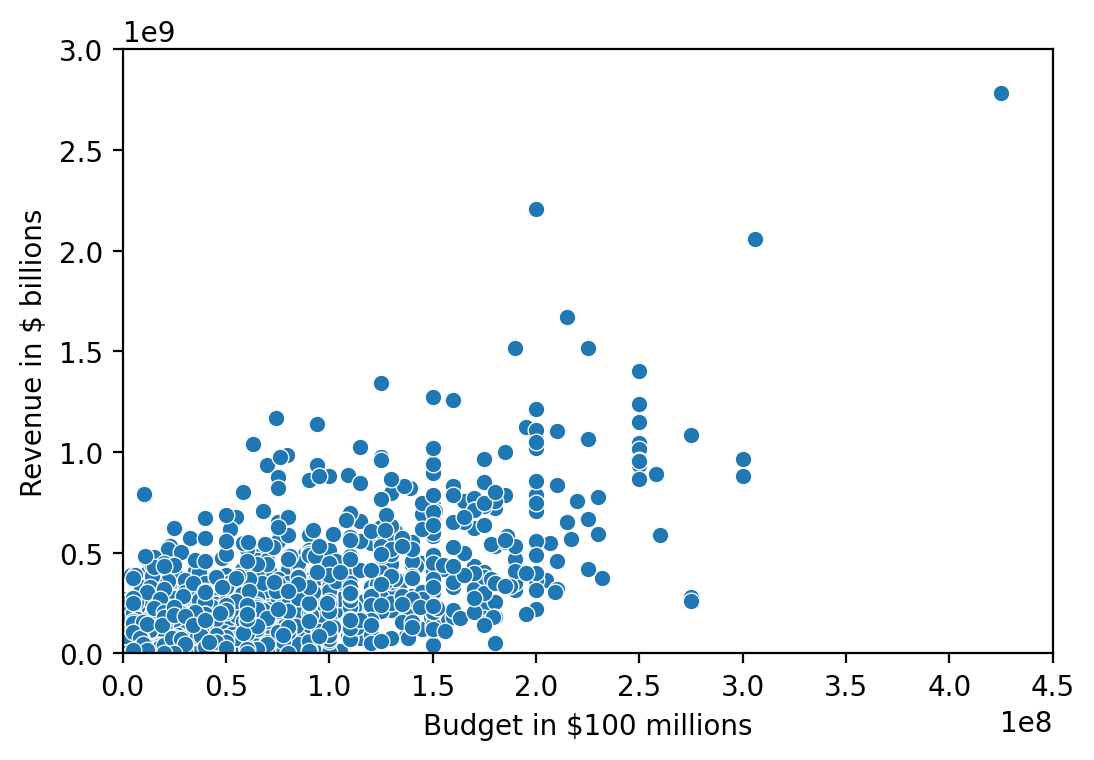

In [55]:
plt.figure(figsize=(6,4), dpi=200)

ax = sns.scatterplot(data=df_new,x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000), xlim=(0, 450000000), ylabel='Revenue in $ billions', xlabel='Budget in $100 millions')

plt.show()

# Plotting Movie Releases over Time

[(0.0, 450000000.0),
 (-19876.0, 17531.0),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Budget in $100 millions')]

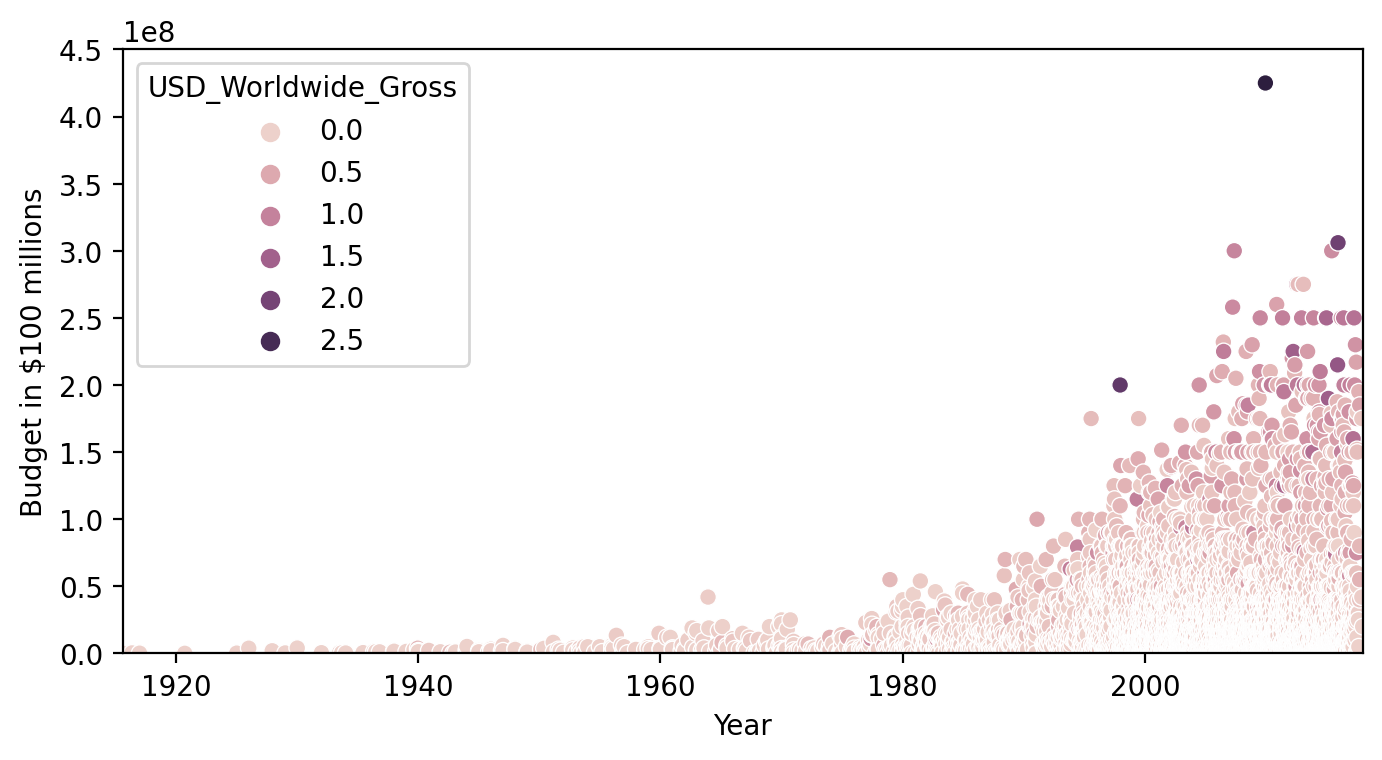

In [57]:
plt.figure(figsize=(8,4), dpi=200)


ax = sns.scatterplot(data=df_new, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross')

ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades

In [58]:
dt_index = pd.DatetimeIndex(df_new.Release_Date)
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [65]:
decades = years//10*10
#df_new.insert(2, 'Decade', decades)
df_new.head()

,Rank,Release_Date,Decade,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,1910,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,1910,Intolerance,385907,0,0
2,5230,1916-12-24,1910,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,1920,The Big Parade,245000,22000000,11000000


# Separate the "old" (before 1969) and "New" (1970s onwards) Films

In [70]:
old_films = df_new[df_new.Decade <= 1970]
new_films = df_new[df_new.Decade > 1970]

In [71]:
old_films.describe()

,Rank,Decade,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,262.000000,262.000000,2.620000e+02,2.620000e+02,2.620000e+02
mean,4073.129771,1957.824427,6.304421e+06,4.731894e+07,3.273485e+07
std,895.724086,14.150251,7.687325e+06,8.684782e+07,4.941933e+07
min,912.000000,1910.000000,2.500000e+04,0.000000e+00,0.000000e+00
25%,3595.000000,1950.000000,1.519250e+06,6.850000e+06,6.600000e+06
50%,4290.000000,1960.000000,3.450000e+06,1.510000e+07,1.374000e+07
75%,4710.250000,1970.000000,8.150000e+06,4.352500e+07,3.708858e+07
max,5356.000000,1970.000000,5.500000e+07,7.865980e+08,4.609980e+08


In [72]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Decade,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
242,912,1978-12-15,1970,Superman,55000000,300200000,134218018
109,1253,1963-12-06,1960,Cleopatra,42000000,71000000,57000000
255,1521,1979-07-12,1970,Star Trek: The Motion Picture,35000000,139000000,82258456
260,1676,1979-12-14,1970,1941,32000000,94875000,34175000
256,1691,1979-08-15,1970,Apocalypse Now,31500000,81250488,78800000


In [73]:
new_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Decade,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,2000,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,2010,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
4925,4,2015-06-11,2010,Spectre,300000000,879620923,200074175
2911,3,2007-05-24,2000,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4333,6,2013-02-07,2010,The Lone Ranger,275000000,260002115,89302115


# regression plot

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

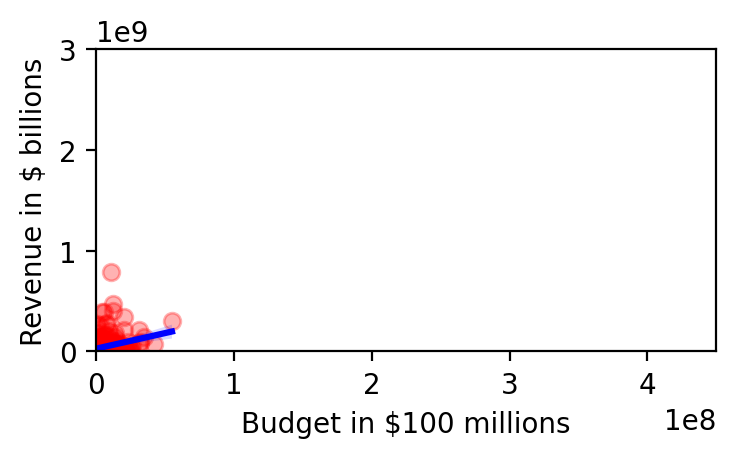

In [85]:
plt.figure(figsize=(4,2), dpi=200)
ax = sns.regplot(data=old_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='r',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': 'b'})
ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

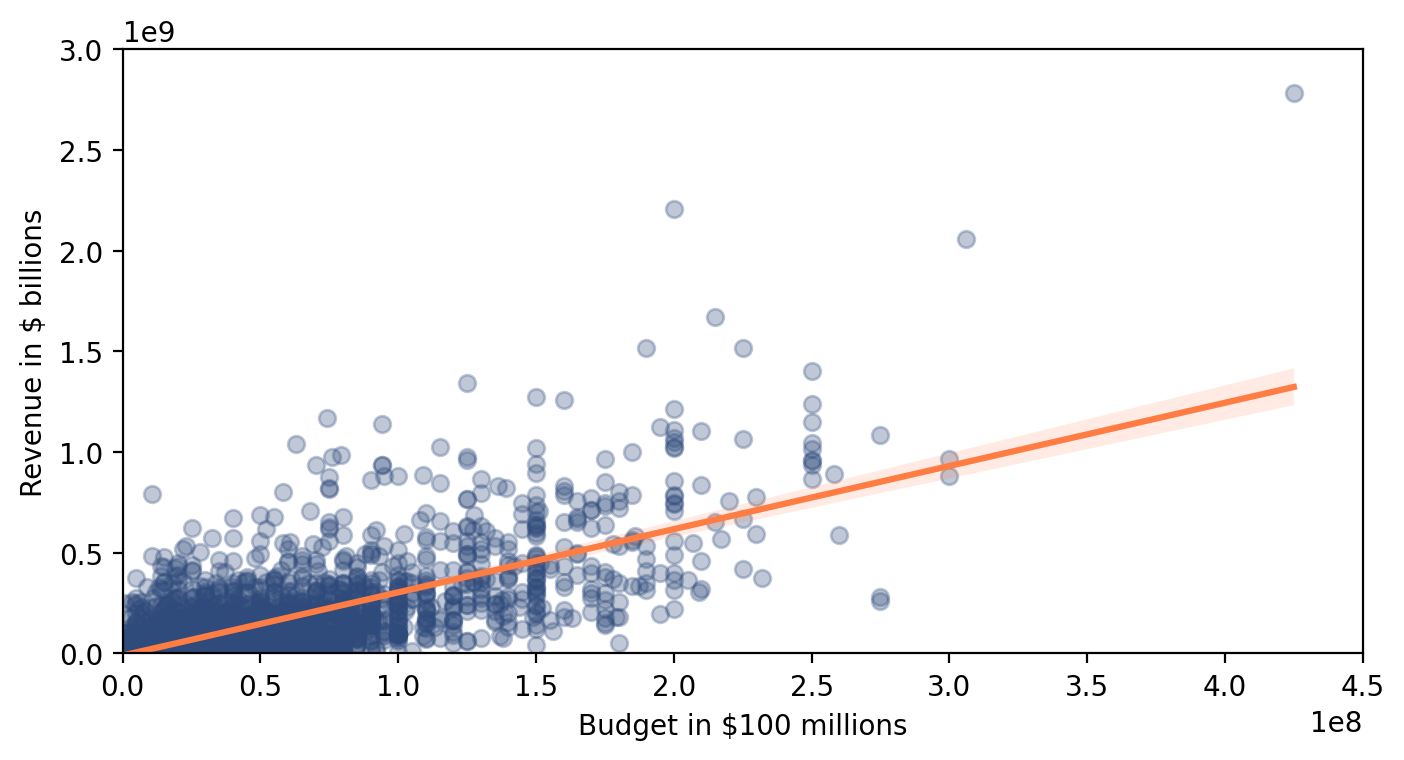

In [79]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr=LinearRegression()

In [88]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [90]:
lr.fit(X, y)

LinearRegression()

In [96]:
c = lr.intercept_

In [97]:
m = lr.coef_

In [103]:
lr.score(X, y)

0.564250171393927

In [105]:
budget = 350000000
revenue_estimate = c + m*budget
#revenue_estimate 
print(revenue_estimate)

[[1.08814268e+09]]
